In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/Abhishek3689/Test_Train_Datsets_CSV_Excel/main/Bengaluru_House_Data.csv')

In [4]:
df.shape

(13320, 9)

In [5]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Data Cleaning

In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
df.isnull().sum()/len(df)*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [8]:
#since society has many null values almost 41% we can drop society column

In [9]:
df.drop('society',axis=1,inplace=True)

In [10]:
df.head(2)

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00


In [11]:
df.nunique()

area_type          4
availability      81
location        1305
size              31
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [12]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [13]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [14]:
## Since area_type and Availability doesnt make any sense to price prediction we can drop them

In [15]:
df=df.drop(['area_type','availability'],axis=1)

In [16]:
df.head(2)

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00


In [17]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [18]:
df1=df.copy()

In [19]:
df1.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [20]:
df1['balcony'].fillna(df1['balcony'].mode()[0],inplace=True)

In [21]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [22]:
## We can drop null values rows 

In [23]:
df1.shape

(13320, 6)

In [24]:
df1.dropna(inplace=True)

In [25]:
df1.shape

(13246, 6)

## Feature Engineering

In [26]:
## Adding new feature by converting from object datatype to integer

In [27]:
df1['BHK_size']=df1['size'].apply(lambda x: int(x.split(' ')[0])) 

In [28]:
df1.sample(5)

,location,size,total_sqft,bath,balcony,price,BHK_size
352,Sampigehalli,3 BHK,1592,3.0,2.0,75.0,3
8241,Binny Pete,3 BHK,1282,3.0,2.0,178.0,3
676,Sulthangunta,1 Bedroom,600,1.0,0.0,50.0,1
9903,Kathriguppe IV Phase,3 BHK,1630,3.0,2.0,131.0,3
12539,Frazer Town,4 BHK,4100,4.0,3.0,660.0,4


In [29]:
df1=df1.drop('size',axis=1)

In [30]:
df1.head(2)

,location,total_sqft,bath,balcony,price,BHK_size
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4


In [31]:
df1['location'].nunique()

1304

In [32]:
## Removing leading and trail spaced from location column

In [33]:
df1['location']=df1['location'].str.strip()

In [34]:
df1['location'].nunique()

1293

In [35]:
## total_sqft has object values instaed of float/int we need to check

In [36]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [37]:
df1.sample(5)

,location,total_sqft,bath,balcony,price,BHK_size
4383,Gunjur,1190,2.0,2.0,40.0,2
1763,KUDLU MAIN ROAD,1464,3.0,2.0,56.0,3
2676,Doddakannelli,1187,2.0,2.0,45.0,2
9556,Sri Venkateshpura Layout,1050,2.0,1.0,49.5,2
7570,Hosur Road,1085,2.0,2.0,33.7,2


In [38]:
def is_float(i):
    try:
        float(i)
    except:
        return False
    return True

In [39]:
## Check values in 'total_sqft' does not get converted to float and reason behind it

In [40]:
df1[(~df1['total_sqft'].apply(is_float))]

,location,total_sqft,bath,balcony,price,BHK_size
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,0.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,1200 - 1470,2.0,0.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,0.0,59.135,2


In [41]:
## Now range of values can be converted to average of min and max

In [42]:
def convert_avg(i):
    j=i.split('-')
    if len(j)==2:
        return (float(j[0])+float(j[1]))/2
    try:
        return float(i)
    except:
        return None
    

In [43]:
df1.shape

(13246, 6)

In [44]:
df1.dtypes

location       object
total_sqft     object
bath          float64
balcony       float64
price         float64
BHK_size        int64
dtype: object

In [45]:
df2=df1.copy()

In [46]:
df2['total_sqft']=df2['total_sqft'].apply(convert_avg)

In [47]:
df2[(~df2['total_sqft'].apply(is_float))]

,location,total_sqft,bath,balcony,price,BHK_size


In [48]:
df2.dtypes

location       object
total_sqft    float64
bath          float64
balcony       float64
price         float64
BHK_size        int64
dtype: object

In [49]:
df2.isnull().sum()

location       0
total_sqft    46
bath           0
balcony        0
price          0
BHK_size       0
dtype: int64

In [50]:
## Checking if range of values @index position 122 has been converted to average
df2.loc[122]         

location      Hebbal
total_sqft    5611.5
bath             4.0
balcony          0.0
price          477.0
BHK_size           4
Name: 122, dtype: object

In [51]:
df2.corr()

,total_sqft,bath,balcony,price,BHK_size
total_sqft,1.000000,0.392743,0.153445,0.574330,0.346013
bath,0.392743,1.000000,0.209658,0.456350,0.898408
balcony,0.153445,0.209658,1.000000,0.124711,0.194508
price,0.574330,0.456350,0.124711,1.000000,0.397222
BHK_size,0.346013,0.898408,0.194508,0.397222,1.000000


<AxesSubplot: >

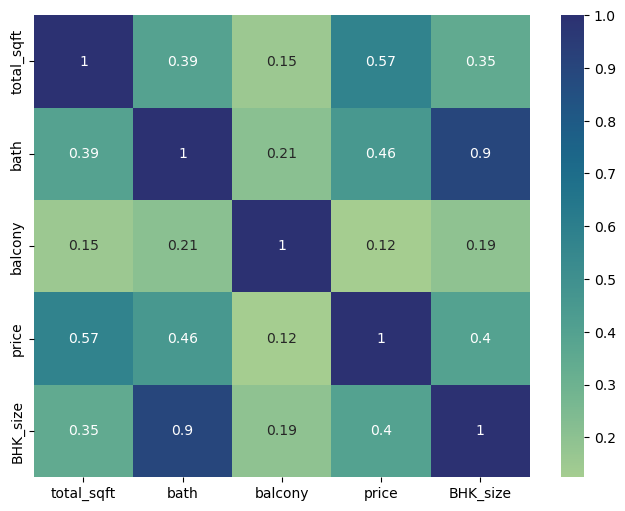

In [52]:
## From plot it is seen that Total_sqft has greater impact on price.
plt.figure(figsize=(8,6))
sns.heatmap(df2.corr(),cmap='crest',annot=True)

In [53]:
df2.shape

(13246, 6)

In [54]:
data=df2.copy() ## Making Copy of df2

In [55]:
data.location.nunique()

1293

In [56]:
data.head()

,location,total_sqft,bath,balcony,price,BHK_size
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [57]:
data.dtypes

location       object
total_sqft    float64
bath          float64
balcony       float64
price         float64
BHK_size        int64
dtype: object

In [58]:
data.isnull().sum()

location       0
total_sqft    46
bath           0
balcony        0
price          0
BHK_size       0
dtype: int64

In [59]:
data.dropna(inplace=True) ## Dropping NA Values

In [60]:
data.shape

(13200, 6)

In [61]:
data.head()

,location,total_sqft,bath,balcony,price,BHK_size
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


#### CHECK THE ABOVE DATA POINTS. WE HAVE 6 BHK APARTMENTS WITH 1020 SQFT. ANOTHER ONE IS 8 BHK AND THE TOTAL SQFT IS 600. THESE ARE CLEAR DATA ERRORS THAT CAN BE REMOVED SAFELY

In [62]:
data=data[~(data['total_sqft']/data['BHK_size']<300)]

#### Take the list of all location and replace the location with 'other' where count is <=10

In [63]:
list1=data['location'].value_counts()

In [64]:
list1

Whitefield                        532
Sarjapur  Road                    388
Electronic City                   295
Kanakpura Road                    262
Thanisandra                       234
                                 ... 
asha township, off hennur road      1
Escorts Colony                      1
Rahat Bagh                          1
Rajanna Layout                      1
Abshot Layout                       1
Name: location, Length: 1205, dtype: int64

In [65]:
less_than_10_list=list1[list1<=10]

In [66]:
less_than_10_list.index

Index(['Nagappa Reddy Layout', '1st Block Koramangala', 'Kalkere',
       'Dodsworth Layout', 'Gunjur Palya', 'Laggere', 'Dairy Circle', 'Tindlu',
       'Sadashiva Nagar', 'Bommenahalli',
       ...
       'Sonam Layout', 'Dasappa Layout', 'NTI Layout', 'GB Palya',
       '1A Block Koramangala', 'asha township, off hennur road',
       'Escorts Colony', 'Rahat Bagh', 'Rajanna Layout', 'Abshot Layout'],
      dtype='object', length=983)

In [67]:
df_refine=data.copy()

In [68]:
df_refine['location']=df_refine['location'].apply(lambda x: 'other' if x in less_than_10_list.index else x )

In [69]:
df_refine['location'].value_counts()

other                        2714
Whitefield                    532
Sarjapur  Road                388
Electronic City               295
Kanakpura Road                262
                             ... 
Banashankari Stage VI          11
LB Shastri Nagar               11
2nd Phase Judicial Layout      11
Nehru Nagar                    11
Kammanahalli                   11
Name: location, Length: 223, dtype: int64

In [70]:
df_refine.shape

(12456, 6)

In [71]:
df_refine.head(2)

,location,total_sqft,bath,balcony,price,BHK_size
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4


In [72]:
df_refine.isnull().sum()

location      0
total_sqft    0
bath          0
balcony       0
price         0
BHK_size      0
dtype: int64

In [73]:
df_refine.describe()

,total_sqft,bath,balcony,price,BHK_size
count,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000
mean,1590.189927,2.562781,1.602280,111.187960,2.649004
std,1260.404795,1.080275,0.798015,152.203367,0.976046
min,300.000000,1.000000,0.000000,9.000000,1.000000
25%,1115.000000,2.000000,1.000000,49.000000,2.000000
50%,1300.000000,2.000000,2.000000,70.000000,3.000000
75%,1700.000000,3.000000,2.000000,115.000000,3.000000
max,52272.000000,16.000000,3.000000,3600.000000,16.000000


In [74]:
df_refine['BHK_size'].value_counts()

2     5476
3     4725
4     1237
1      635
5      200
6       91
7       42
8       25
9       15
10       6
11       2
16       1
13       1
Name: BHK_size, dtype: int64

In [75]:
## Remove the data where BHK_size is greater than 20

In [76]:
df_refine[(df_refine['BHK_size']>20)]

,location,total_sqft,bath,balcony,price,BHK_size


In [77]:
df_refine=df_refine[~(df_refine['BHK_size']>20)] 

#### Will derive new feature 'price_per_sqft' by converting price in Rs by multiplying price by 100000 and divide by total_sqft

In [78]:

df_refine['price_per_sqft']=round(df_refine['price']*100000/df_refine['total_sqft'],2) 

In [79]:
df_refine.head()

,location,total_sqft,bath,balcony,price,BHK_size,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.81
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.38
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.56
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.89
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.00


In [80]:
df_refine.describe()

,total_sqft,bath,balcony,price,BHK_size,price_per_sqft
count,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000
mean,1590.189927,2.562781,1.602280,111.187960,2.649004,6308.502836
std,1260.404795,1.080275,0.798015,152.203367,0.976046,4168.127366
min,300.000000,1.000000,0.000000,9.000000,1.000000,267.830000
25%,1115.000000,2.000000,1.000000,49.000000,2.000000,4210.530000
50%,1300.000000,2.000000,2.000000,70.000000,3.000000,5294.120000
75%,1700.000000,3.000000,2.000000,115.000000,3.000000,6916.670000
max,52272.000000,16.000000,3.000000,3600.000000,16.000000,176470.590000


In [81]:
df_refine.price_per_sqft.describe().round()

count     12456.0
mean       6309.0
std        4168.0
min         268.0
25%        4211.0
50%        5294.0
75%        6917.0
max      176471.0
Name: price_per_sqft, dtype: float64

#### HERE WE FIND THAT MIN PRICE PER SQFT IS 268 RS/SQFT WHEREAS MAX IS 12000000, THIS SHOWS A WIDE VARIATION IN PROPERTY PRICES. WE SHOULD REMOVE OUTLIERS PER LOCATION USING MEAN AND ONE STANDARD DEVIATION

In [82]:
### Applying Mean Plus/Minus Standard Deviation to get the appropriate data on Price/sqft

In [83]:
upper_limit=df_refine['price_per_sqft'].mean()+(df_refine['price_per_sqft'].std())

In [84]:
upper_limit

10476.630202513245

In [85]:
lower_limit=df_refine['price_per_sqft'].mean()-(df_refine['price_per_sqft'].std())

In [86]:
lower_limit

2140.3754702548995

In [87]:
df_updated=df_refine[df_refine['price_per_sqft'].between(lower_limit,upper_limit)]

In [88]:
df_updated.shape

(11294, 7)

In [89]:
df_updated.describe()

,total_sqft,bath,balcony,price,BHK_size,price_per_sqft
count,11294.000000,11294.00000,11294.000000,11294.000000,11294.000000,11294.000000
mean,1488.781925,2.46051,1.595715,83.924714,2.564193,5371.339351
std,854.503358,0.97910,0.788658,67.062615,0.901162,1667.328777
min,300.000000,1.00000,0.000000,10.000000,1.000000,2149.280000
25%,1100.000000,2.00000,1.000000,47.250000,2.000000,4123.710000
50%,1275.000000,2.00000,2.000000,65.000000,2.000000,5091.925000
75%,1625.000000,3.00000,2.000000,97.000000,3.000000,6363.640000
max,30400.000000,16.00000,3.000000,2100.000000,16.000000,10476.190000


In [90]:
df_updated.head()

,location,total_sqft,bath,balcony,price,BHK_size,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.81
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.38
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.56
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.89
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.00


In [91]:
df_updated.shape

(11294, 7)

In [92]:
### We can Drop now Price_per_sqft as we have cleaned the data 

In [93]:
df_updated.drop('price_per_sqft',axis=1,inplace=True)

In [94]:
df_updated.head(2)

,location,total_sqft,bath,balcony,price,BHK_size
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4


In [95]:
## Now we will convert the location to one_hot_enocing

In [96]:
df_one_hot_location=pd.get_dummies(df_updated['location'])

In [97]:
df_one_hot_location.shape

(11294, 222)

In [98]:
## Creating Our final Cleaned and processed Data for model building

In [99]:
df_final=pd.concat([df_updated,df_one_hot_location],axis=1)

In [100]:
df_final.head()

,location,total_sqft,bath,balcony,price,BHK_size,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,1200.0,2.0,1.0,51.00,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
df_final.drop('location',axis=1,inplace=True)

In [102]:
df_final.shape

(11294, 227)

## Model Building

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score

In [106]:
X=df_final.drop('price',axis=1)
y=df_final['price']

In [108]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=25)

In [109]:
lg=LinearRegression()
lg.fit(x_train,y_train)
lg.score(x_test,y_test)

0.8215822117480365

#### USE K FOLD CROSS VALIDATION TO MEASURE ACCURACY OF OUR LINEAR REGRESSION MODEL

In [110]:
from sklearn.model_selection import ShuffleSplit,KFold
from sklearn.model_selection import cross_val_score
cv=KFold(n_splits=5)
#cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.88530276, 0.799681  , 0.78009158, 0.81984079, 0.83992289])

### WE CAN SEE THAT IN 5 ITERATIONS WE GET A SCORE ABOVE 80% ALL THE TIME. THIS IS PRETTY GOOD BUT WE WANT TO TEST FEW OTHER ALGORITHMS FOR REGRESSION TO SEE IF WE CAN GET AN EVEN BETTER SCORE. WE WILL USE GRIDSEARCHCV FOR THIS PURPOSE

In [111]:
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score
cv=KFold(n_splits=5)

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


algorithms = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept':[True,False],
                'n_jobs':[1,2,-1],
                
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    

In [112]:
def best_model_with_params(X,y):
    scores=[]
    cv=KFold(n_splits=5)
    for algo_name,config in algorithms.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=True)
        gs.fit(X,y)
        scores.append({'model':algo_name,'best_Score':gs.best_score_,'best_params':gs.best_params_})
    return pd.DataFrame(scores,columns=['model','best_Score','best_params'])
    

In [113]:
best_model_with_params(X,y)

,model,best_Score,best_params
0,linear_regression,0.825025,"{'fit_intercept': False, 'n_jobs': 1}"
1,lasso,0.796290,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.743954,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [114]:
LR=LinearRegression(fit_intercept=False,n_jobs=1)

In [115]:
LR.fit(X,y)

LinearRegression(fit_intercept=False, n_jobs=1)

In [116]:
### Predcit Price By using Location,area,bathroom,balcony and BHK

In [119]:
def price_estimate(location,total_sqft,bath,balcony,BHK_size):
    loc_index=np.where(X.columns==location)[0][0]
    p=np.zeros(len(X.columns))
    p[0]=total_sqft
    p[1]=bath
    p[2]=balcony
    p[3]=BHK_size
    if loc_index>=0:
        p[loc_index]=1
        
    return LR.predict([p])[0]

In [120]:
price_estimate('Electronic City Phase II',1000,2,2,2)

30.79134390033937

In [121]:
price_estimate('Whitefield',1800,3,2,3)

106.8372645896354

In [122]:
price_estimate('Sarjapur  Road',1500,2,2,3)

83.93465919031443

In [123]:
price_estimate('Chikka Tirupathi',2600,4,2,3)

113.1675702568304

### Saving the Model

In [126]:
import pickle
with open('model.pkl','wb') as file_obj:
    pickle.dump(LR,file_obj)

In [127]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))